In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\Vivek\AppData\Local\Temp\ipykernel_4268\3774153950.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [4]:
print("\nTop 5 rows of the dataset:")
print(df.head())


Top 5 rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
df.drop_duplicates(keep='first', inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
print("\nCleaned Dataset Information:")
print(df.info())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB
None


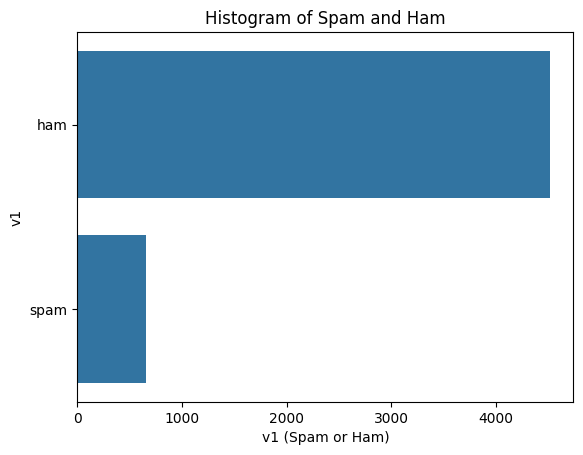

In [7]:
sns.countplot(df['v1'])
plt.title('Histogram of Spam and Ham')
plt.xlabel('v1 (Spam or Ham)')
plt.show()

In [8]:
df['v1'] = np.where(df['v1'] == 'spam', 1, 0)

In [9]:
X = df['v2']
y = df['v1']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test_vectorized)

In [14]:
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy Score: 0.9854932301740812

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034


Confusion Matrix:
 [[887   2]
 [ 13 132]]


In [15]:
new_emails = ["Special discount on tech gadgets!", "Meeting at 3 PM in the conference room."]
new_emails_vectorized = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_vectorized)
print("\nPredictions for new emails:")
for email, prediction in zip(new_emails, predictions):
    spam_label = "Spam" if prediction == 1 else "Not Spam"
    print(f"Email: {email} - Prediction: {spam_label}")


Predictions for new emails:
Email: Special discount on tech gadgets! - Prediction: Spam
Email: Meeting at 3 PM in the conference room. - Prediction: Not Spam
